In [1]:
%reload_ext nb_black

import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.multitest import multipletests
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

%matplotlib inline
import os

print(os.getcwd())

print(os.listdir(os.getcwd()))
energy = pd.read_csv("modern-renewable-energy-consumption.csv")

C:\Users\jlim7\OneDrive\Documents\GitHub\Capstone1_Rename_later
['.git', '.gitignore', '.ipynb_checkpoints', '769175_1325857_bundle_archive.zip', 'Data Analysis.ipynb', 'Initial EDA.ipynb', 'modern-renewable-energy-consumption.csv', 'Presentation.ipynb', 'README.md', 'Research Proposal.ipynb']


<IPython.core.display.Javascript object>

In [2]:
top = ["United States", "China", "India"]
top_energy = energy[energy["Entity"].isin(top)]
us = energy[energy["Entity"] == "United States"]
china = energy[energy["Entity"] == "China"]
india = energy[energy["Entity"] == "India"]
rec_year = top_energy[top_energy["Year"] >= 2010]

<IPython.core.display.Javascript object>

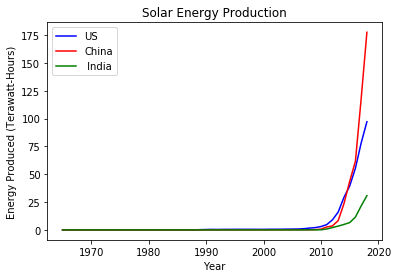

<IPython.core.display.Javascript object>

In [3]:
# Start with this and the wind plot to show the rapid growth of solar and wind energy within the last decade. (Explains
# why renewable energy is important and how according to past trends it is expected to continue on its rapid growth)
plt.plot(us["Year"], us["Solar (terawatt-hours)"], "-b", label="US")
plt.plot(china["Year"], china["Solar (terawatt-hours)"], "-r", label="China")
plt.plot(india["Year"], india["Solar (terawatt-hours)"], "-g", label=" India")
plt.title("Solar Energy Production")
plt.xlabel("Year")
plt.ylabel("Energy Produced (Terawatt-Hours)")
plt.legend(loc="upper left")
plt.show()

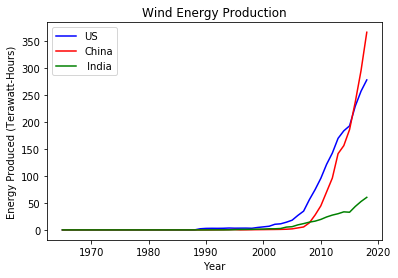

<IPython.core.display.Javascript object>

In [4]:
plt.plot(us["Year"], us["Wind (terawatt-hours)"], "-b", label="US")
plt.plot(china["Year"], china["Wind (terawatt-hours)"], "-r", label="China")
plt.plot(india["Year"], india["Wind (terawatt-hours)"], "-g", label=" India")
plt.title("Wind Energy Production")
plt.xlabel("Year")
plt.ylabel("Energy Produced (Terawatt-Hours)")
plt.legend(loc="upper left")
plt.show()

This data set illustrates the production of renewable energy sources for 99 different countries all around the world from the years 1965 to 2018. The energy sources include hydropower, solar, wind, geothermal and modern biofuel.
The data set was obtained from https://www.kaggle.com/khadeejahalghadeer/renewable-energy-generation-world-1965-to-2018. 
The creator of this data set obtained the data from BP's Statistical Review of World Energy and can be found at http://www.bp.com/statisticalreview.

According to statista, in 2019 the top three energy consuming countries were China, the United States, and India. (Include chart on the website as a visual https://www.statista.com/statistics/263455/primary-energy-consumption-of-selected-countries/) 
I analyzed the kaggle data to determine if there was a significant difference between the production of solar and wind energy in the US versus the production of solar and wind energy in China and India.

In [5]:
t, p = stats.kruskal(
    top_energy.loc[top_energy["Entity"] == "United States", ["Solar (terawatt-hours)"]],
    top_energy.loc[top_energy["Entity"] == "China", ["Solar (terawatt-hours)"]],
    top_energy.loc[top_energy["Entity"] == "India", ["Solar (terawatt-hours)"]],
)
if p < 0.05:
    print("There is a significant difference. Reject the null hypothesis")
else:
    print("There is no significant difference. Cannot reject the null hypothesis")
print(p)
_, p1 = stats.mannwhitneyu(
    us["Solar (terawatt-hours)"], china["Solar (terawatt-hours)"]
)
_, p2 = stats.mannwhitneyu(
    us["Solar (terawatt-hours)"], india["Solar (terawatt-hours)"]
)
_, p3 = stats.mannwhitneyu(
    china["Solar (terawatt-hours)"], india["Solar (terawatt-hours)"]
)

p_values = [p1, p2, p3]
reject, corr_p, sidak, bonf = multipletests(p_values, alpha=0.05)
print(p_values)
print(reject)

There is a significant difference. Reject the null hypothesis
0.006402094683951255
[0.012935468271930638, 0.001493744735485237, 0.1375139249718007]
[ True  True False]


<IPython.core.display.Javascript object>

In [6]:
def cles_ind(x1, x2):
    x1 = np.array(x1)
    x2 = np.array(x2)

    diff = x1[:, None] - x2
    cles = max((diff < 0).sum(), (diff > 0).sum()) / diff.size

    return cles


x1 = us["Solar (terawatt-hours)"]
x2 = china["Solar (terawatt-hours)"]
x3 = india["Solar (terawatt-hours)"]
print(cles_ind(x1, x2))
print(cles_ind(x1, x3))

0.5432098765432098
0.565843621399177


<IPython.core.display.Javascript object>

In [7]:
rec_year

,Entity,Code,Year,Hydropower (terawatt-hours),Solar (terawatt-hours),Wind (terawatt-hours),Other renewables (terawatt-hours)
869,China,CHN,2010,711.383140,0.701000,44.622000,24.900230
870,China,CHN,2011,688.045000,2.610000,70.331000,27.707000
871,China,CHN,2012,862.794110,3.594510,95.978000,30.484845
872,China,CHN,2013,909.611273,8.373887,141.197000,37.286429
873,China,CHN,2014,1051.146674,23.512157,156.078000,46.421649
874,China,CHN,2015,1114.515410,43.560000,185.766000,54.070290
875,China,CHN,2016,1153.269500,61.686000,237.071000,62.134767
876,China,CHN,2017,1165.070000,117.800000,295.000000,79.597146
877,China,CHN,2018,1202.430000,177.500000,366.000000,90.723462
1850,India,IND,2010,108.744098,0.113000,19.456400,14.295000


<IPython.core.display.Javascript object>

There is around a 54% chance that if a value was chosen from the U.S solar energy production it would be larger than a value from China's solar energy production. In other words, for 54% of the years from 1965 to 2018, the United States had produced more solar energy than China. However, when we take a look at the Solar Energy Produced vs Year Plot, we see China has recently surpassed the United States in solar energy produced. One reason for this may be because the United States has shifted its priorities on solar energy and decided to focus on other renewable energy production. Another possibility could be that China has increased its priority on solar energy production and have decided to focus more on solar energy opposed to other renewables.

When comparing the United States and India, there is around a 56% chance that if a value was chosen from the U.S solar production, it would be larger than a value from India's solar energy production. However, using the point plot, we can see since 2010, the United States has consistently produced more solar energy than India. Additionally, the gap between the two countries has continued to widen. This is a good representation that solar energy in the United States is continuing to develop and production is consistently growing. 

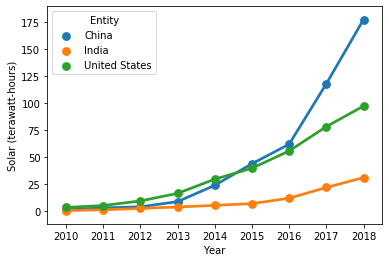

<IPython.core.display.Javascript object>

In [8]:
ax = sns.pointplot(x="Year", y="Solar (terawatt-hours)", hue="Entity", data=rec_year)

In [9]:
t, p = stats.kruskal(
    top_energy.loc[top_energy["Entity"] == "United States", ["Wind (terawatt-hours)"]],
    top_energy.loc[top_energy["Entity"] == "China", ["Wind (terawatt-hours)"]],
    top_energy.loc[top_energy["Entity"] == "India", ["Wind (terawatt-hours)"]],
)
if p < 0.05:
    print("There is a significant difference. Reject the null hypothesis")
else:
    print("There is no significant difference. Cannot reject the null hypothesis")
print(p)
_, p1 = stats.mannwhitneyu(us["Wind (terawatt-hours)"], china["Wind (terawatt-hours)"])
_, p2 = stats.mannwhitneyu(us["Wind (terawatt-hours)"], india["Wind (terawatt-hours)"])
_, p3 = stats.mannwhitneyu(
    china["Wind (terawatt-hours)"], india["Wind (terawatt-hours)"]
)

p_values = [p1, p2, p3]
reject, corr_p, sidak, bonf = multipletests(p_values, alpha=0.05)
print(p_values)
print(reject)

There is no significant difference. Cannot reject the null hypothesis
0.12251965106037972
[0.04595743267799342, 0.03352119293398198, 0.47934734052822003]
[False False False]


<IPython.core.display.Javascript object>

There was no significant difference found between wind energy production in the U.S, China, and India. I predict the reason for this is because most of the data before the year 2010 was close to 0 for the top three countries. Thus there was no major significant difference during the first ~35 years. It wasn't until around the 2000's that the data started to differ in wind energy production. Therefore, we are unable to reject the null hypothesis. 

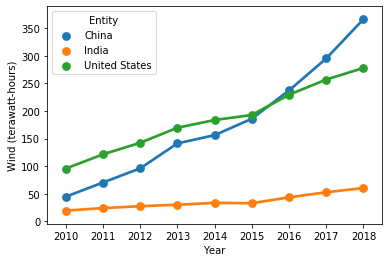

<IPython.core.display.Javascript object>

In [10]:
ax = sns.pointplot(x="Year", y="Wind (terawatt-hours)", hue="Entity", data=rec_year)